Data yang digunakan adalah tentang terjadinya krisis keuangan di Indonesia. Variabel input (Prediktor) berupa 12 indikator makroekonomi Indonesia, sedangkan variabel output (target) merupakan kondisi krisis keuangan di Indonesia.

0 : Tidak Terjadi Krisis Keuangan

1 : Terjadi Krisis Keuangan

## Import Library

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Datasets

In [25]:
data = pd.read_csv('krisis.csv', sep = ';')

## Data Understanding

In [26]:
data.head()

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
0,0,1845.2,6068.2,504.27,1.24,15.56,4.36,14.567329,376.63,1.2366,10.66,0.0055,6.46,1
1,1,2055.0,6259.1,612.20,1.24,16.63,5.83,16.707625,375.39,1.2129,12.15,0.0056,6.16,1
2,4,1750.0,5767.5,624.33,1.22,14.77,7.92,16.067787,388.69,1.0374,12.58,0.0066,6.77,0
3,5,1812.0,6392.7,614.41,1.19,14.29,7.91,16.274743,396.82,1.0315,12.23,0.0060,7.04,0
4,6,2124.0,6615.6,556.34,1.18,16.66,9.74,16.913348,397.52,1.0400,12.08,0.0060,6.76,0


In [27]:
data.shape

(270, 14)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Id                                      270 non-null    int64  
 1   Ekspor                                  270 non-null    float64
 2   Cadangan Devisa                         270 non-null    float64
 3   IHSG                                    270 non-null    float64
 4   Selisih Pinjaman dan Simpanan           270 non-null    float64
 5   Suku Bunga Simpanan Riil                270 non-null    float64
 6   Selisih BI Rate Riil dan FED Rate Riil  270 non-null    float64
 7   Simpanan bank                           270 non-null    float64
 8   Nilai Tukar Riil                        270 non-null    float64
 9   Nilai Tukar Perdagangan                 270 non-null    float64
 10  M1                                      270 non-null    float6

In [29]:
data.describe()

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,174.429630,8247.868963,53516.383556,2071.609444,1.500222,12.016000,8.328000,134.058398,7232.566259,1.225759,41.406296,0.003716,6.763333,0.111111
std,101.887141,4853.028611,41132.468503,2014.293535,0.333443,7.509484,7.233576,100.175825,5550.579030,0.214566,29.628941,0.001151,5.115211,0.314853
min,0.000000,1750.000000,5767.500000,226.680000,0.660000,0.680000,1.250000,14.567329,375.390000,0.851500,7.350000,0.002000,4.190000,0.000000
25%,88.250000,4082.750000,19042.000000,462.717500,1.220000,6.622500,5.107500,58.468779,742.267500,1.063950,16.475000,0.003000,5.020000,0.000000
50%,172.500000,6261.415000,34816.185000,759.030000,1.505000,10.395000,6.515000,83.851499,6753.570000,1.166350,26.455000,0.003200,6.180000,0.000000
75%,262.750000,12936.765000,102477.375000,3916.700000,1.760000,15.330000,8.822500,245.694303,10000.275000,1.373825,73.185000,0.004600,7.900000,0.000000
max,351.000000,18530.800000,130196.380000,6597.220000,2.410000,52.980000,59.880000,330.612337,19358.390000,1.857700,104.840000,0.006600,86.970000,1.000000


## Data Cleaning and Preprocessing

### Check Duplicate Data

In [30]:
data = data.drop_duplicates()

In [31]:
data.shape

(270, 14)

### Check Data Types

In [32]:
data.dtypes

Id                                          int64
Ekspor                                    float64
Cadangan Devisa                           float64
IHSG                                      float64
Selisih Pinjaman dan Simpanan             float64
Suku Bunga Simpanan Riil                  float64
Selisih BI Rate Riil dan FED Rate Riil    float64
Simpanan bank                             float64
Nilai Tukar Riil                          float64
Nilai Tukar Perdagangan                   float64
M1                                        float64
M2/Cadangan Devisa                        float64
M2M                                       float64
Krisis                                      int64
dtype: object

### Check Missing Value

In [33]:
data.isnull().sum()

Id                                        0
Ekspor                                    0
Cadangan Devisa                           0
IHSG                                      0
Selisih Pinjaman dan Simpanan             0
Suku Bunga Simpanan Riil                  0
Selisih BI Rate Riil dan FED Rate Riil    0
Simpanan bank                             0
Nilai Tukar Riil                          0
Nilai Tukar Perdagangan                   0
M1                                        0
M2/Cadangan Devisa                        0
M2M                                       0
Krisis                                    0
dtype: int64

### Outlier Detection

##### Variabel Ekspor

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


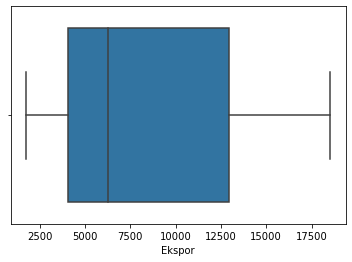

In [35]:
sns.boxplot(data["Ekspor"])
plt.show()

##### Variabel Cadangan Devisa

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


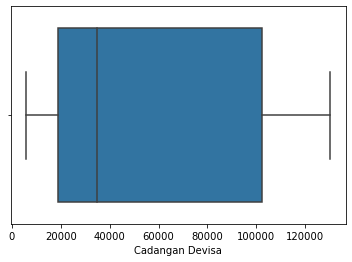

In [36]:
sns.boxplot(data["Cadangan Devisa"])
plt.show()

##### Variabel IHSG

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


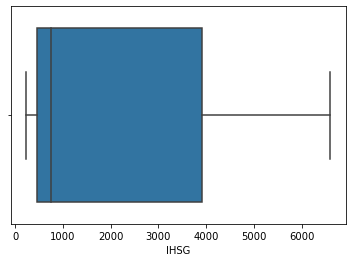

In [37]:
sns.boxplot(data["IHSG"])
plt.show()

##### Variabel Selisih Pinjaman dan Simpanan

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


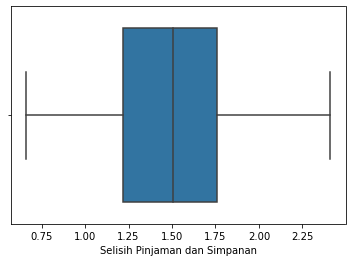

In [38]:
sns.boxplot(data["Selisih Pinjaman dan Simpanan"])
plt.show()

##### Variabel Suku Bunga Simpanan Riil (Terdapat Outlier)

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


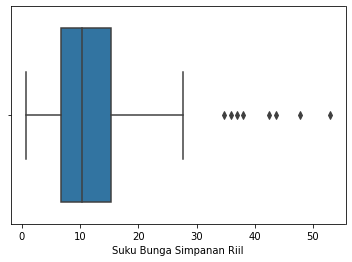

In [39]:
sns.boxplot(data["Suku Bunga Simpanan Riil"])
plt.show()

In [40]:
Q1=data["Suku Bunga Simpanan Riil"].quantile(0.25)
Q3=data["Suku Bunga Simpanan Riil"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["Suku Bunga Simpanan Riil"]>upper_range),:]

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
77,100,4668.0,18769.0,445.92,0.83,35.99,47.98,23.505570,6838.86,1.6437,7.35,0.0020,8.05,0
78,102,4252.0,19735.0,342.43,0.79,38.05,59.05,32.776524,5851.73,1.3886,9.44,0.0025,7.88,0
79,103,4781.0,20475.0,276.15,0.75,43.63,59.88,35.314860,5858.66,1.5696,9.59,0.0025,7.83,0
80,105,3542.0,22623.0,386.27,0.66,52.98,46.42,57.130959,3979.76,1.4451,13.83,0.0033,7.54,0
81,106,3557.0,23516.0,398.03,0.71,47.81,32.21,53.631277,4439.82,1.4430,12.61,0.0031,7.69,0
82,107,3041.0,24542.0,411.93,0.76,42.53,28.95,48.650391,5086.23,1.4210,11.39,0.0027,7.97,0
83,108,3357.0,24392.0,396.00,0.91,36.94,31.61,50.421077,5017.68,1.3691,11.85,0.0028,7.75,0
84,110,4127.0,25715.0,495.22,0.93,34.77,31.85,55.035835,4658.60,1.3625,12.19,0.0029,8.13,0


In [41]:
data.loc[(data["Suku Bunga Simpanan Riil"]>upper_range),"Suku Bunga Simpanan Riil"]=upper_range

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


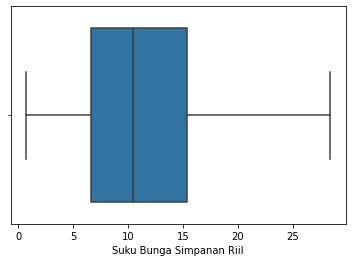

In [43]:
sns.boxplot(data["Suku Bunga Simpanan Riil"])
plt.show()

##### Variabel Selisih BI Rate dan FED Rate Riil (Terdapat Outlier)

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


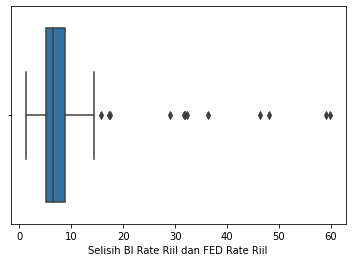

In [45]:
sns.boxplot(data["Selisih BI Rate Riil dan FED Rate Riil"])
plt.show()

In [46]:
Q1=data["Selisih BI Rate Riil dan FED Rate Riil"].quantile(0.25)
Q3=data["Selisih BI Rate Riil dan FED Rate Riil"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["Selisih BI Rate Riil dan FED Rate Riil"]>upper_range),:]

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
70,91,4689.0,21187.0,546.68,1.01,25.13000,15.66,72.183206,997.72,1.0516,20.23,0.0047,8.98,1
75,97,4908.0,16613.0,541.42,1.02,21.99000,17.17,37.741862,3330.95,1.4945,11.80,0.0033,7.57,1
76,98,4385.0,17742.0,460.13,1.00,24.70000,36.41,42.973067,3131.46,1.1893,12.72,0.0034,7.43,1
77,100,4668.0,18769.0,445.92,0.83,28.39125,47.98,23.505570,6838.86,1.6437,7.35,0.0020,8.05,0
78,102,4252.0,19735.0,342.43,0.79,28.39125,59.05,32.776524,5851.73,1.3886,9.44,0.0025,7.88,0
79,103,4781.0,20475.0,276.15,0.75,28.39125,59.88,35.314860,5858.66,1.5696,9.59,0.0025,7.83,0
80,105,3542.0,22623.0,386.27,0.66,28.39125,46.42,57.130959,3979.76,1.4451,13.83,0.0033,7.54,0
81,106,3557.0,23516.0,398.03,0.71,28.39125,32.21,53.631277,4439.82,1.4430,12.61,0.0031,7.69,0
82,107,3041.0,24542.0,411.93,0.76,28.39125,28.95,48.650391,5086.23,1.4210,11.39,0.0027,7.97,0
83,108,3357.0,24392.0,396.00,0.91,28.39125,31.61,50.421077,5017.68,1.3691,11.85,0.0028,7.75,0


In [47]:
data.loc[(data["Selisih BI Rate Riil dan FED Rate Riil"]>upper_range),"Selisih BI Rate Riil dan FED Rate Riil"]=upper_range

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


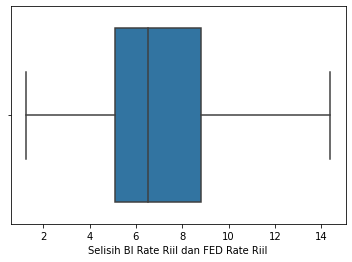

In [49]:
sns.boxplot(data["Selisih BI Rate Riil dan FED Rate Riil"])
plt.show()

##### Variabel Simpanan Bank

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


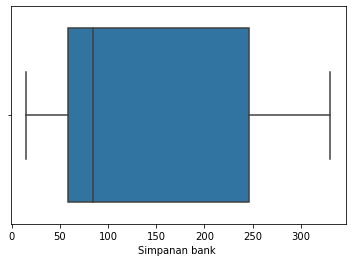

In [50]:
sns.boxplot(data["Simpanan bank "])
plt.show()

##### Variabel Nilai Tukar Riil

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


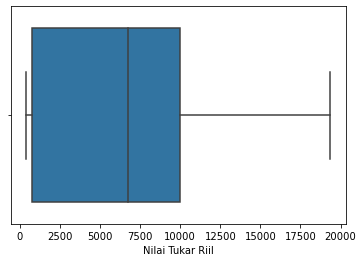

In [51]:
sns.boxplot(data["Nilai Tukar Riil"])
plt.show()

##### Variabel Nilai Tukar Perdagangan (Terdapat Outlier)

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


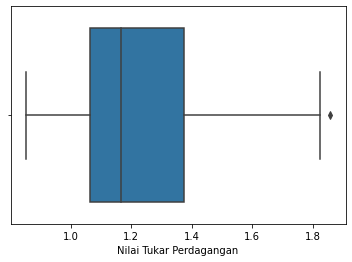

In [52]:
sns.boxplot(data["Nilai Tukar Perdagangan"])
plt.show()

In [53]:
Q1=data["Nilai Tukar Perdagangan"].quantile(0.25)
Q3=data["Nilai Tukar Perdagangan"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["Nilai Tukar Perdagangan"]>upper_range),:]

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
93,120,5012.49,28401.0,576.54,1.56,12.57,5.9,68.02052,4141.63,1.8577,16.28,0.0031,7.5,0


In [54]:
data.loc[(data["Nilai Tukar Perdagangan"]>upper_range),"Nilai Tukar Perdagangan"]=upper_range

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


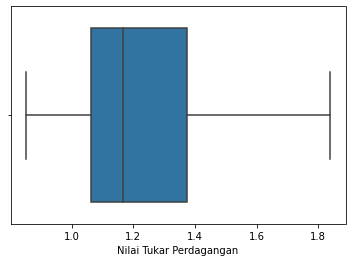

In [55]:
sns.boxplot(data["Nilai Tukar Perdagangan"])
plt.show()

##### Variabel M1

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


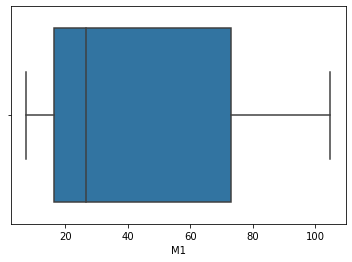

In [56]:
sns.boxplot(data["M1"])
plt.show()

##### Variabel M2/Cadangan Devisa

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


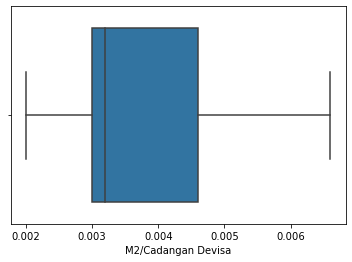

In [57]:
sns.boxplot(data["M2/Cadangan Devisa"])
plt.show()

##### Variabel M2M (Terdapat Outlier)

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


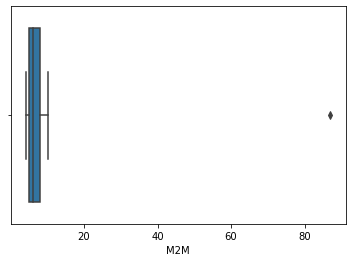

In [58]:
sns.boxplot(data["M2M"])
plt.show()

In [59]:
Q1=data["M2M"].quantile(0.25)
Q3=data["M2M"].quantile(0.75)
IQR=Q3-Q1
lower_range = Q1 -(1.5 * IQR)
upper_range = Q3 +(1.5 * IQR)
data.loc[(data["M2M"]>upper_range),:]

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
30,38,2958.0,12204.5,314.1,1.39,15.38,9.64,43.860656,509.62,1.3235,14.32,0.0049,86.97,0


In [60]:
data.loc[(data["M2M"]>upper_range),"M2M"]=upper_range

C:\Users\Bintang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


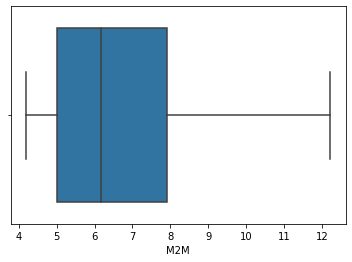

In [61]:
sns.boxplot(data["M2M"])
plt.show()

## Data Partition

In [62]:
data=data.drop(labels="Id",axis=1)

In [63]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train,test = train_test_split(data,test_size = 0.20 ,random_state = 111)
    
##seperating dependent and independent variables on training and testing data
train_X = train.drop(labels='Krisis',axis=1)
train_Y = train['Krisis']
test_X  = test.drop(labels='Krisis',axis=1)
test_Y  = test['Krisis']

## SMOTE (Synthetic Minority Oversampling Technique)

In [64]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=train_X.columns)
train_smote_Y = pd.DataFrame(data = train_smote_Y)

In [65]:
train_Y.value_counts()

0    193
1     23
Name: Krisis, dtype: int64

In [66]:
train_smote_Y.value_counts()

Krisis
1         193
0         193
dtype: int64

## Random Forest

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto','log2'],
    'criterion' :['entropy','gini']
}

In [68]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_smote_X, train_smote_Y)

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vec

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vec

C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bintang\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 500, 1000]})

In [69]:
CV_rfc.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200}

In [70]:
CV_rfc.best_score_

0.9844821844821844

#### Evaluation

In [71]:
pred=CV_rfc.predict(test_X)

In [72]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_Y,pred))

Accuracy for Random Forest on CV data:  0.9444444444444444


In [73]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(test_Y, pred)
CF

array([[46,  1],
       [ 2,  5]], dtype=int64)

In [74]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y,pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.98      0.97        47
         Yes       0.83      0.71      0.77         7

    accuracy                           0.94        54
   macro avg       0.90      0.85      0.87        54
weighted avg       0.94      0.94      0.94        54



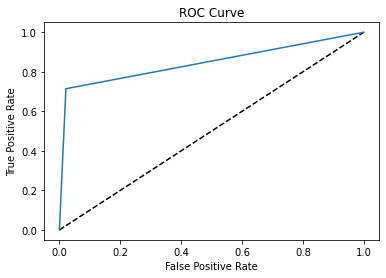

In [75]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred)

0.8465045592705167

### Predict Model

In [77]:
predict = pd.read_csv('krisis_predict.csv', sep = ';')

In [78]:
predict = predict.drop(labels="Id",axis=1)

In [79]:
Krisis = CV_rfc.predict(predict)

In [80]:
Krisis

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Create New Dataset from Prediction

In [81]:
predict_fix = pd.read_csv('krisis_predict.csv', sep = ';')

In [82]:
predict_fix['Krisis'] = Krisis

In [83]:
predict_fix

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
0,2,1803.00,5914.10,638.79,1.26,14.73,3.92,15.655003,380.27,1.6888,12.27,0.0062,5.78,1
1,3,1802.00,5259.70,636.40,1.23,15.13,4.32,15.321895,384.14,1.0033,11.56,0.0071,6.92,1
2,7,2603.00,6514.50,468.51,1.15,17.85,9.96,17.309013,397.46,1.1523,12.33,0.0063,7.02,0
3,8,2639.00,6826.80,416.49,1.12,18.42,10.05,17.449252,400.90,1.4283,12.05,0.0061,7.14,0
4,11,2554.00,8539.80,383.02,1.17,20.61,12.36,18.391736,410.74,1.3151,12.04,0.0052,7.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,337,15586.87,126003.20,6188.99,1.80,5.68,2.66,322.246484,17507.78,1.0777,98.95,0.0031,5.19,0
79,342,15865.10,117927.18,6018.46,1.71,6.17,3.74,305.112663,18739.04,0.9433,94.10,0.0032,5.50,0
80,343,14956.30,114847.52,5976.55,1.69,6.44,3.93,303.529235,18960.65,1.0237,94.56,0.0033,5.63,0
81,345,14851.70,117211.83,6056.12,1.59,6.32,3.28,319.576407,18339.79,0.8787,98.00,0.0034,5.69,0


In [84]:
predict_fix = predict_fix.drop(labels=['Ekspor', 'Cadangan Devisa', 'IHSG', 
                                       'Selisih Pinjaman dan Simpanan', 'Suku Bunga Simpanan Riil',
                                       'Selisih BI Rate Riil dan FED Rate Riil', 'Simpanan bank ', 'Nilai Tukar Riil',
                                       'Nilai Tukar Perdagangan', 'M1', 'M2/Cadangan Devisa', 'M2M'], axis=1)

In [85]:
predict_fix

,Id,Krisis
0,2,1
1,3,1
2,7,0
3,8,0
4,11,0
...,...,...
78,337,0
79,342,0
80,343,0
81,345,0
